In [1]:
from qiskit import QuantumCircuit
import numpy as np

In [5]:
def dj(nq):
    qc = QuantumCircuit(nq + 1)
    if np.random.randint(0,2):
        qc.x(nq)  
    if np.random.randint(0,2):
        return qc
    
    on_states = np.random.choice(range(2**nq), 2**nq//2, replace=False)

    def add_cx(qc, bit_str):
        for qubit, bit in enumerate(reversed(bit_str)):
            if bit == '1':
                qc.x(qubit)
        return qc
    
    for state in on_states:
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(nq)), nq)
        qc = add_cx(qc, f"{state:0b}")
    qc.barrier()
    return qc

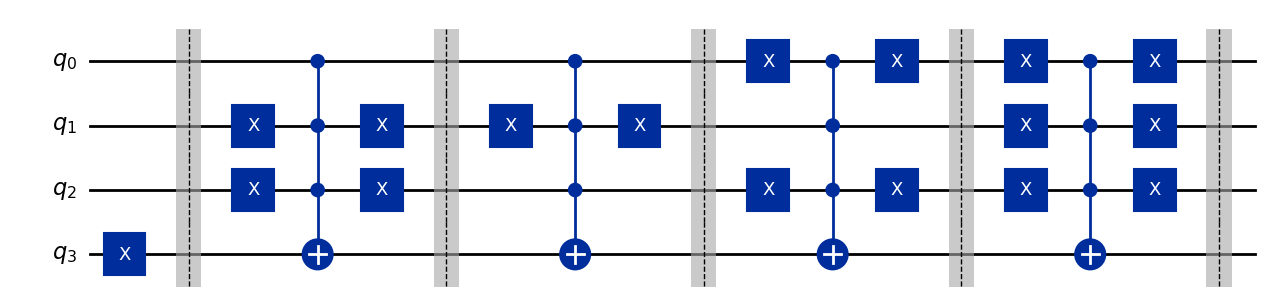

In [6]:
display(dj(3).draw('mpl'))